<a href="https://colab.research.google.com/github/Th4l3s-pr0g/CEUB-OS/blob/master/ClassificacaoTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Passo 1: importar o dataset para o Colab.

In [18]:
import pandas as pd
import numpy as np
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
dataFrame = pd.read_csv(url)
print("Quantidade de linhas:", len(dataFrame))
print("Qauntidade de colunas:", len(dataFrame.columns))

Quantidade de linhas: 887
Qauntidade de colunas: 8


Passo 2: agora que os dados estão importado, é hora de fazer uma análise exploratória para entender o que há na base.

In [19]:
dataFrame.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


Passo 2.1: vamos pedir par ao Pandas no prover informações gerais sobre o dataset.

In [20]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


Passo 2.2: vamos analisar quantos valores nulos há para cada coluna.

In [21]:
dataFrame.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
Siblings/Spouses Aboard,0
Parents/Children Aboard,0
Fare,0


Passo 2.3: vamos pedir para o Pandas exibir dados estatístico relevantes associados ao data set.

In [22]:
dataFrame.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


Passo 2.4: vamos avaliar quantas pessoas da base sobreviveram e quanta faleceram.

In [23]:
dataFrame['Survived'].value_counts()

,count
Survived,
0,545
1,342


Passo 2.5: vamos verificar quantos passageiros tinham em cada classe. Só que agora vamos pedir para a informação ser exibida graficamente.

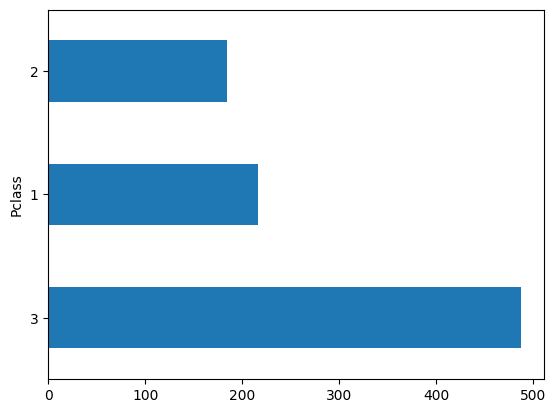

In [24]:
import matplotlib.pyplot as plt
dataFrame['Pclass'].value_counts().plot(kind='barh')
plt.show()

Passo 2.6: Vamos gerar um histograma da idade.

<Axes: >

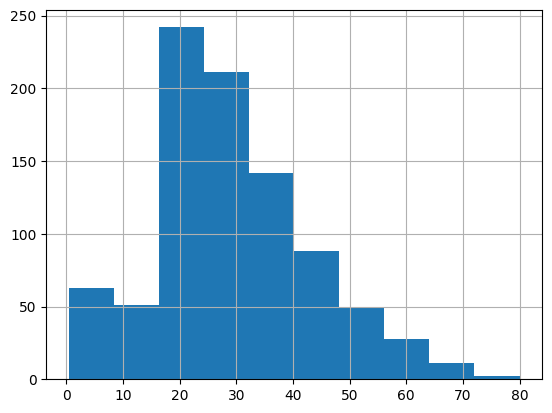

In [25]:
dataFrame['Age'].hist()

Passo 3: Ao realizar a análise exploratória, precebemos que o sexo não está fromatado com valores numéricos. Diante disso, vamos converter os valores de forma que o sexo feminino seja 0 e o masculino seja 1.

In [26]:
dataFrame['Sex']=dataFrame['Sex'].map({'female':0,'male':1})
dataFrame

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,1,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,0,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,0,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,0,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,1,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,0,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,0,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,1,26.0,0,0,30.0000


Passo 4: agora que o dataframe está bem formatado, vamos separar as variáveis independentes da dependente.

In [27]:
variaveisIndependentes=['Pclass','Sex','Age','Siblings/Spouses Aboard',
                        'Parents/Children Aboard','Fare']
X = dataFrame[variaveisIndependentes]
X

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
882,2,1,27.0,0,0,13.0000
883,1,0,19.0,0,0,30.0000
884,3,0,7.0,1,2,23.4500
885,1,1,26.0,0,0,30.0000


In [28]:
y = dataFrame['Survived']
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
882,0
883,1
884,0
885,1


Passo 5: sabemos que os modelos que abrangem aprendizagem de máquina estão sujeito a overfitting. Para mitigar esse risco separamos dados para treinamento e dados para teste.

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.10)
print("Quantidade de registros separados para treinamento:", len(X_train))
print("Quantidade de registros separados para teste:",len(X_test))

Quantidade de registros separados para treinamento: 798
Quantidade de registros separados para teste: 89


Passo 6: Agora estamos prontos para aplicar a classificação. Neste caso utilizaremos a abordagem de Regressão Logística.

In [30]:
from sklearn.linear_model import LogisticRegression
objClassificador = LogisticRegression()
objClassificador.fit(X_train, y_train)

LogisticRegression()

Uma vez que a regressão logística foi treinada, vamos ver a acurácia do modelo, o que significa avaliar se o grau de acerto ao analisar os dados separados para teste.

In [31]:
from sklearn.metrics import accuracy_score
# Primeiro, vamos pedir para o classificador classificar
# os dados utilizados no treinamento
y_pred = objClassificador.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(accuracy)

0.7994987468671679


Agora, vamos ver a acurácia do classificador ao explorar os dados separados para teste.

In [32]:
y_pred_test = objClassificador.predict(X_test)
accuracyTest = accuracy_score(y_test,y_pred_test)
print("Acurácia do modelo com dados de teste",accuracyTest)

Acurácia do modelo com dados de teste 0.8764044943820225


In [33]:
# Calculate the correlation matrix, excluding non-numeric columns.
dataFrame.select_dtypes(include=np.number).corr()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Survived,1.000000,-0.336528,-0.542152,-0.059665,-0.037082,0.080097,0.256179
Pclass,-0.336528,1.000000,0.129507,-0.391492,0.085026,0.020252,-0.548919
Sex,-0.542152,0.129507,1.000000,0.091875,-0.113249,-0.244337,-0.181137
Age,-0.059665,-0.391492,0.091875,1.000000,-0.297669,-0.193741,0.112329
Siblings/Spouses Aboard,-0.037082,0.085026,-0.113249,-0.297669,1.000000,0.414244,0.158839
Parents/Children Aboard,0.080097,0.020252,-0.244337,-0.193741,0.414244,1.000000,0.215470
Fare,0.256179,-0.548919,-0.181137,0.112329,0.158839,0.215470,1.000000
